In [57]:
import plotly.graph_objs as go
import pandas as pd
from plotly.offline import iplot
import numpy as np
import statistics 
import plotly.express as px
from numpy.lib import recfunctions as rfn

In [18]:
e7_t01_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T01_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
e7_t02_rawCount_data = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T02_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
cell_types = pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_E7_cell_type.txt", sep="\t") #pandas DataFrame for cell types

In [77]:
# cell_types.head()

# cell_types.SampleID.unique()

# updated_list = []
# for t in cell_types['SampleID'].values:
#     if t in ['T01', 'T02']:
#         updated_list.append('TP-1')
#     elif t in ['T04','T05']:
#         updated_list.append('TP-2')
#     elif t in ['T07','T08','T09','T10']:
#         updated_list.append('TP-3')
#     elif t in ['T11','T13']:
#         updated_list.append('TP-4')
#     elif t in ['T15','T16','T17','T18']:
#         updated_list.append('TP-5')
#     elif t in ['T20','T21','T22']:
#         updated_list.append('TP-6')
#     else:
#         updated_list.append('NA')
        
# # print(len(updated_list))
        
# cell_types['TimePoint'] = updated_list

cell_types.head()

,CellID,SampleID,CellType,TimePoint
0,AAACCTGTCGACGGAA-1,T01,Acinar,TP-1
1,AAACCTGTCGTAGATC-1,T01,Acinar,TP-1
2,AAAGATGAGAGTCTGG-1,T01,Acinar,TP-1
3,AAAGTAGTCATACGGT-1,T01,Acinar,TP-1
4,AAATGCCCACATCCGG-1,T01,Acinar,TP-1


In [67]:
# Data dict
sample_dict = {
    'T01': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T01_logNorm.csv.gz", sep=",", index_col=0,low_memory=False), #pandas DataFrame,
    'T02': pd.read_csv("/Users/krilowcn/Desktop/Projects/GSIS/data/normalizedData/200613_E7_logNorm/200613_T02_logNorm.csv.gz", sep=",", index_col=0,low_memory=False) #pandas DataFrame
}

In [80]:
# print(e7_t01_rawCount_data.head(-10))
# print(e7_t02_rawCount_data.shape)

# print(sample_dict.get("T02"))

In [103]:
cells = pd.DataFrame([], columns = ['gene', 'mean_expr_1', 'mean_expr_2', 'cell_type', 'time_point'])

for cell_type in np.unique(cell_types['CellType']):
    if cell_type == "unknown":
        continue
    sub_cells = cell_types[cell_types.CellType == cell_type]
    for time_point in np.unique(cell_types['TimePoint']):
        ## To do -- deal with High / low glucose treatment
        ## This should be a list of maximum two samples
        sampls = np.unique(cell_types[cell_types.TimePoint == time_point]['SampleID'])

        if (len(sampls) != 2):
            continue 
        ## Get sample IDs
        counts_1 = sample_dict.get(sampls[0])
        counts_2 = sample_dict.get(sampls[1])
        print(counts_1)
#         barcodes = sub_cells[sub_cells.SampleID == time_point] 
        if barcodes.empty:
            continue
        barcodes_1 = sub_cells[sub_cells.SampleID == sampls[0]]['CellID'].values
        barcodes_2 = sub_cells[sub_cells.SampleID == sampls[1]]['CellID'].values
        
#         print("Barcodes: " + sub_cells[sub_cells.SampleID == sampls[0]]['CellID'].values )
        print(np.mean(counts_1.loc[:, barcodes_1],axis=1))
        means_1 = np.mean(counts_1.loc[:, barcodes_1],axis=1) 
        means_2 = np.mean(counts_2.loc[:, barcodes_2],axis=1)
        joint_index = np.intersect1d(means_1.index.values, means_2.index.values)
        if(cell_type =='Beta'):
            print(joint_index)
            print(len(joint_index))
            print(len(set(joint_index)))
#             sub_set = cells.duplicated(subset=['gene'])
        cells = cells.append( #look at the gene name for R1 and R2, output that and compare to see if they match or not*
            pd.DataFrame({
                'gene': joint_index,
                'mean_expr_1': means_1.loc[joint_index].values,
                'mean_expr_2': means_2.loc[joint_index].values,
                'cell_type': [cell_type] * len(joint_index),
                'time_point': [time_point] * len(joint_index)
            }))

            AAACCTGAGCTTTGGT-1  AAACCTGGTAAATACG-1  AAACCTGGTAGCCTAT-1  \
TSPAN6                     0.0            0.000000            0.423038   
DPM1                       0.0            0.617793            0.423038   
FGR                        0.0            0.000000            0.000000   
CFH                        0.0            0.000000            0.000000   
FUCA2                      0.0            0.451004            0.423038   
...                        ...                 ...                 ...   
EEF1AKMT4                  0.0            0.000000            0.000000   
BX255925.3                 0.0            0.090737            0.000000   
POLR2J3                    0.0            0.090737            0.000000   
AC022137.3                 0.0            0.090737            0.000000   
AL445524.2                 0.0            0.000000            0.000000   

            AAACCTGGTTACCGAT-1  AAACCTGTCAAACGGG-1  AAACCTGTCGACGGAA-1  \
TSPAN6                0.000000       

AttributeError: 'NoneType' object has no attribute 'loc'

In [84]:
cells

,gene,mean_expr_1,mean_expr_2,cell_type,time_point
0,A1BG,0.039469,0.036593,Acinar,TP-1
1,A1CF,0.132401,0.147538,Acinar,TP-1
2,A2M,0.000000,0.001921,Acinar,TP-1
3,A4GALT,0.013010,0.011905,Acinar,TP-1
4,AAAS,0.038964,0.059762,Acinar,TP-1
...,...,...,...,...,...
9558,ZSWIM8,0.038018,0.036335,Acinar,TP-1
9559,ZUP1,0.021437,0.024794,Acinar,TP-1
9560,ZWINT,0.024431,0.023154,Acinar,TP-1
9561,ZYG11B,0.038656,0.038515,Acinar,TP-1


In [46]:
# cells

# sub_frame = cells[cells['gene']=='INS']
# sub_frame.head()
sub_set = cells.duplicated(subset=['gene'])



# updated_list = []
# for t in cells['time_point'].values:
#     if t in ['T01', 'T02']:
#         updated_list.append('TP-1')
#     elif t in ['T04','T05']:
#         updated_list.append('TP-2')
#     elif t in ['T07','T08','T09','T10']:
#         updated_list.append('TP-3')
#     elif t in ['T11','T13']:
#         updated_list.append('TP-4')
#     elif t in ['T15','T16','T17','T18']:
#         updated_list.append('TP-5')
#     elif t in ['T20','T21','T22']:
#         updated_list.append('TP-6')
        
# print(len(updated_list))
        
# cells['time_point'] = updated_list

# sub_frame = cells[cells['gene']=='INS']
# display(sub_frame)

# subset_cells = cells[cells.cell_type %in% ['Alpha','Beta','Delta','Gamma','Epsilon']].copy()

0       False
1       False
2       False
3       False
4       False
        ...  
9558     True
9559     True
9560     True
9561     True
9562     True
Length: 1654399, dtype: bool

In [55]:
# subset_cells = cells[cells.cell_type %in% ['Alpha','Beta','Delta','Gamma']].copy()

# subset_cells = cells[cells['cell_type'].isin(['Alpha','Beta','Delta','Gamma'])].copy()   
# subset_cells


duplicate = subset_cells[subset_cells.duplicated('gene')] 
print(duplicate)

# subset_cells2 = subset_cells[subset_cells['time_point'].isin(['TP-1'])].copy()
# subset_cells2

        gene  mean_expr_1  mean_expr_2 cell_type time_point
0       A1BG          0.0     0.653069     Alpha        T02
1       A1CF          0.0     0.363727     Alpha        T02
2        A2M          0.0     0.000000     Alpha        T02
3     A4GALT          0.0     0.013187     Alpha        T02
4       AAAS          0.0     0.111613     Alpha        T02
...      ...          ...          ...       ...        ...
9558  ZSWIM8          NaN     0.000000     Gamma        T22
9559    ZUP1          NaN     0.216491     Gamma        T22
9560   ZWINT          NaN     0.000000     Gamma        T22
9561  ZYG11B          NaN     0.114093     Gamma        T22
9562     ZYX          NaN     0.000000     Gamma        T22

[640721 rows x 5 columns]


In [29]:
# subset_cells2.head(-10)
# sub_frame = subset_cells[subset_cells['gene']=='INS']
# sub_frame.head()



/Users/krilowcn/anaconda3/envs/BINF/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 38252 rows containing missing values.


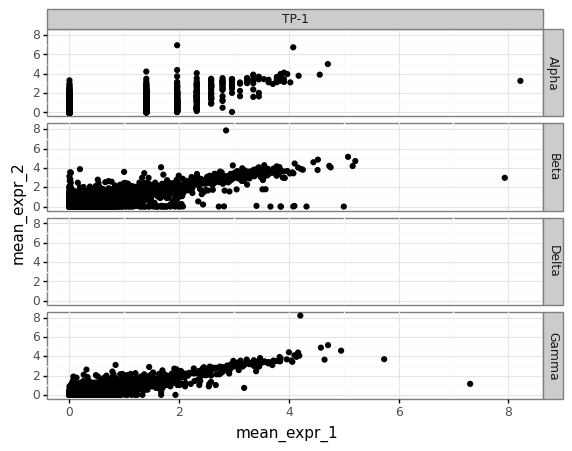

<ggplot: (8784660182402)>

In [104]:
import plotnine as plt9

#AB line, set line =0 and slope =1 
# plt9.ggplot(cells, plt9.aes(x='mean_expr_1', y = 'mean_expr_2')) + plt9.geom_point() + plt9.facet_grid('cell_type ~ time_point') + plt9.theme_bw()
plt9.ggplot(subset_cells2, plt9.aes(x='mean_expr_1', y = 'mean_expr_2')) + plt9.geom_point(alpha=0.25) + plt9.facet_grid('cell_type ~ time_point') + plt9.theme_bw()

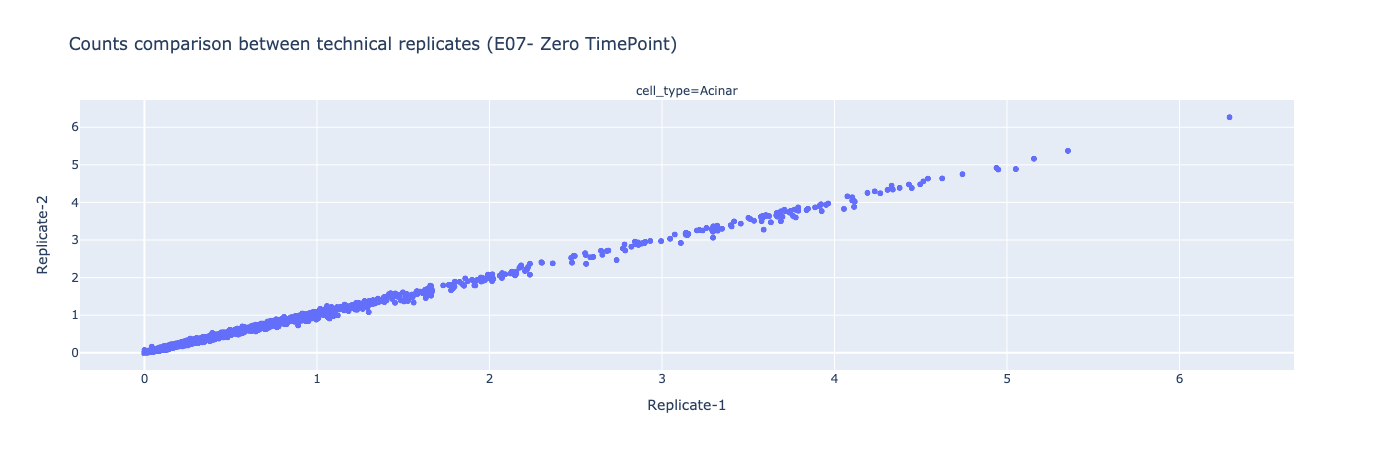

In [85]:
# fig = px.scatter(subset_cells2, x="mean_expr_1", y="mean_expr_2", facet_col="cell_type",hover_name=subset_cells2.gene)
fig = px.scatter(cells, x="mean_expr_1", 
                 y="mean_expr_2", 
                 facet_col="cell_type",
                 hover_name=cells.gene,
                 title = 'Counts comparison between technical replicates (E07- Zero TimePoint)',
                 labels={
                     "mean_expr_1": "Replicate-1",
                     "mean_expr_2": "Replicate-2",
                 },)
fig.show()